# Data Import

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/thesis

/content/drive/My Drive/thesis


In [ ]:
df=pd.read_csv("hpcleanvlarge1.csv")
df.head()

,Chapters,Favs,Follows,Published,Reviews,Updated,Words,author,characters,genre,language,rating,story_link,synopsis,title,published_mmyy,pairing
0,1,2,NaN,12/31/2019,1.0,NaN,"6,840",reviews,"Sirius B., Remus L., James P., Regulus B.",Angst/Hurt/Comfort,English,T,https://www.fanfiction.net/s/13466909/1/If-You...,Regulus and James aren't happy. They know they...,If You Change Your Mind,12-2019,NaN
1,1,1,NaN,12/31/2019,NaN,NaN,"10,962",JoyI9199,"Harry P., Draco M., Narcissa M., Charlie W.",Angst/Drama,English,M,https://www.fanfiction.net/s/13466894/1/Bloody...,When a plot from the Founder's age is revealed...,Bloody Ballgowns,12-2019,NaN
2,1,3,2,12/31/2019,NaN,NaN,"8,592",MoonytheMarauder1,"[James P., Regulus B.]",Angst,English,M,https://www.fanfiction.net/s/13466885/1/Nothin...,"Regulus Black is supposed to be dead, but he's...",Nothing Left To Do,12-2019,"James P., Regulus B."
3,2,NaN,NaN,12/31/2019,NaN,NaN,"7,260",LaviniaKatt,Cedric D.,Romance/Fantasy,English,M,https://www.fanfiction.net/s/13466880/1/Patien...,This is a spin off of Harry Potter taking plac...,Patience is a Virtue,12-2019,NaN
4,1,4,3,12/31/2019,NaN,NaN,"1,529",Rowena-Moon-Moon,NaN,NaN,English,T,https://www.fanfiction.net/s/13466807/1/An-Und...,Harry makes a new discovery and perhaps a few ...,An Understanding,12-2019,NaN


In [ ]:
df.shape

(648493, 17)

In [ ]:
df.isna().sum()

Chapters               0
Favs               72163
Follows           143204
Published              0
Reviews            52189
Updated           410228
Words                  0
author                 0
characters         63040
genre              59927
language               0
rating                 0
story_link             0
synopsis              11
title                 16
published_mmyy         0
pairing           256823
dtype: int64

In [ ]:
df = df.dropna(subset=['synopsis', 'genre'])

In [ ]:
df.shape

(588557, 17)

# proposal

In [ ]:
lang_count = df[["language", "title"]].copy().groupby(by = "language").count()
lang_count.reset_index(inplace = True) # realign the column names after the groupby
lang_count.sort_values(by = "title", ascending = False, inplace = True) # sort the result by number of stories, from the major one

lang_count

,language,title
11,English,457970
37,Spanish,46892
17,French,42990
32,Portuguese,20157
18,German,9547
31,Polish,3282
24,Indonesian,3228
38,Swedish,761
10,Dutch,714
25,Italian,594


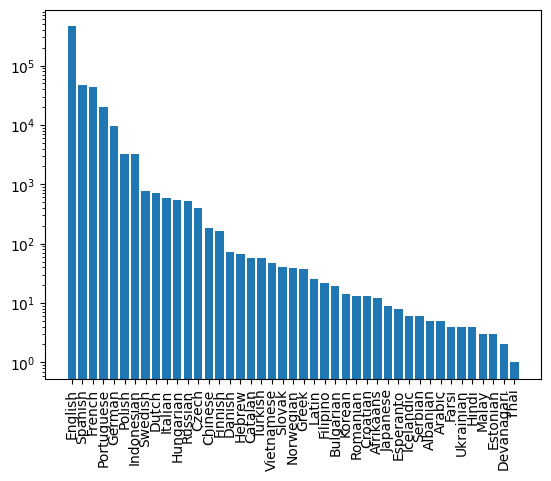

In [ ]:
x = lang_count['language'].values
y = lang_count['title'].values
x_pos = np.arange(len(x)) # define the position of the bars in the plot
plt.bar(x_pos, y)
plt.xticks(x_pos, x, rotation = 90) # define the name of the bars in the chart
plt.yscale("log") # display the y axis on a log scale

plt.show()

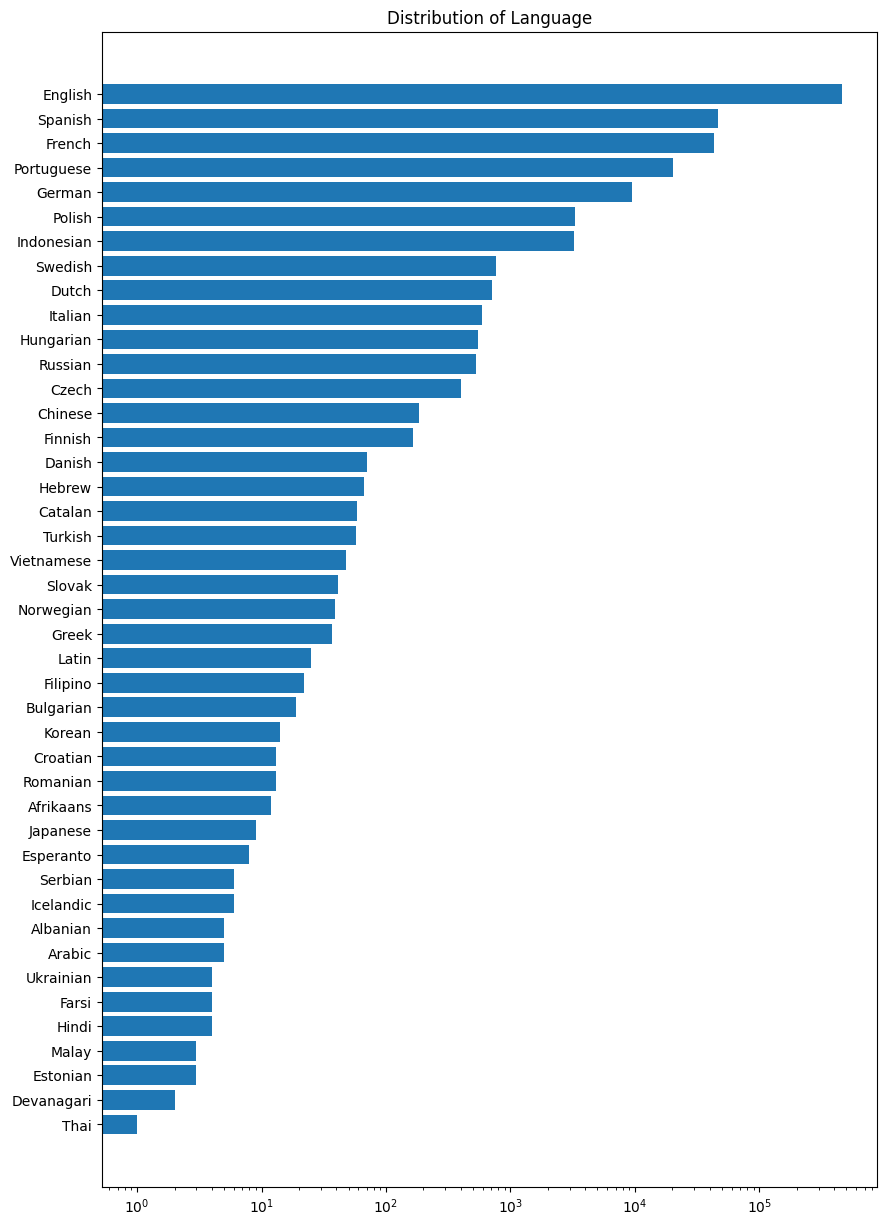

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 lang_count 是你的 DataFrame，已经正确计算了语言和标题的统计
x = lang_count['language'].values
y = lang_count['title'].values
y_pos = np.arange(len(x)) # 定义条形的位置

plt.figure(figsize=(10, 15))
plt.barh(x, y)
plt.xscale("log")
plt.title('Distribution of Language')
plt.gca().invert_yaxis()
plt.show()


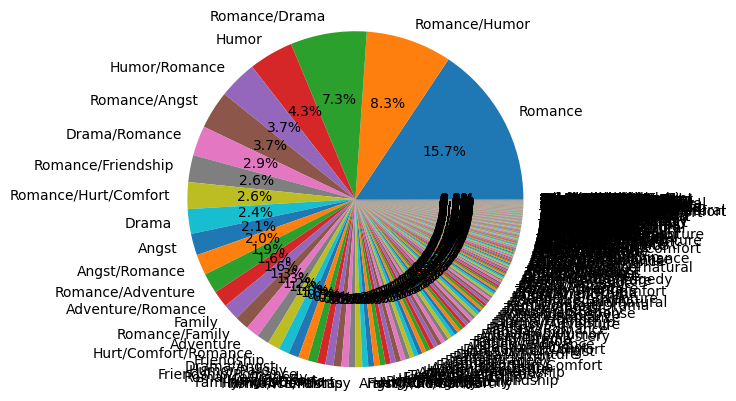

In [ ]:
# 计算类型的出现频率
genre_counts = df['genre'].value_counts()

# 制作饼状图
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 保证饼图是圆形的
plt.show()

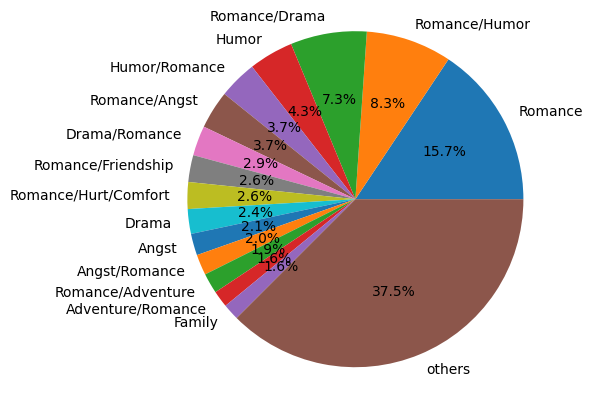

In [ ]:
top_genres = genre_counts.head(15)

# 将其他类别合并为"其他"
other = genre_counts[15:].sum()
top_genres['others'] = other

# 制作饼状图
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%')
plt.axis('equal')  # 保证饼图是圆形的
plt.show()

# preprocessing

In [ ]:
def custom_genre_split(genre_string):
    # Temporary replacement for 'Hurt/Comfort'
    genre_string = genre_string.replace('Hurt/Comfort', 'Hurt-Comfort')

    # Now split by '/'
    genres = genre_string.split('/')

    # Revert the replacement
    genres = [genre.replace('Hurt-Comfort', 'Hurt/Comfort') for genre in genres]

    return genres

In [ ]:
df['genre'] = df['genre'].apply(custom_genre_split)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'genre' lists into a binary matrix
y = mlb.fit_transform(df[df['language'] == 'English']['genre'])

# Output the class labels to verify
print("Labels:", mlb.classes_)

Labels: ['Adventure' 'Angst' 'Crime' 'Drama' 'Family' 'Fantasy' 'Friendship'
 'Horror' 'Humor' 'Hurt/Comfort' 'Mystery' 'Parody' 'Poetry' 'Romance'
 'Sci-Fi' 'Spiritual' 'Supernatural' 'Suspense' 'Tragedy' 'Western']


In [ ]:
synopsis = df[df['language'] == 'English']['synopsis']
synopsis.shape

(457975,)

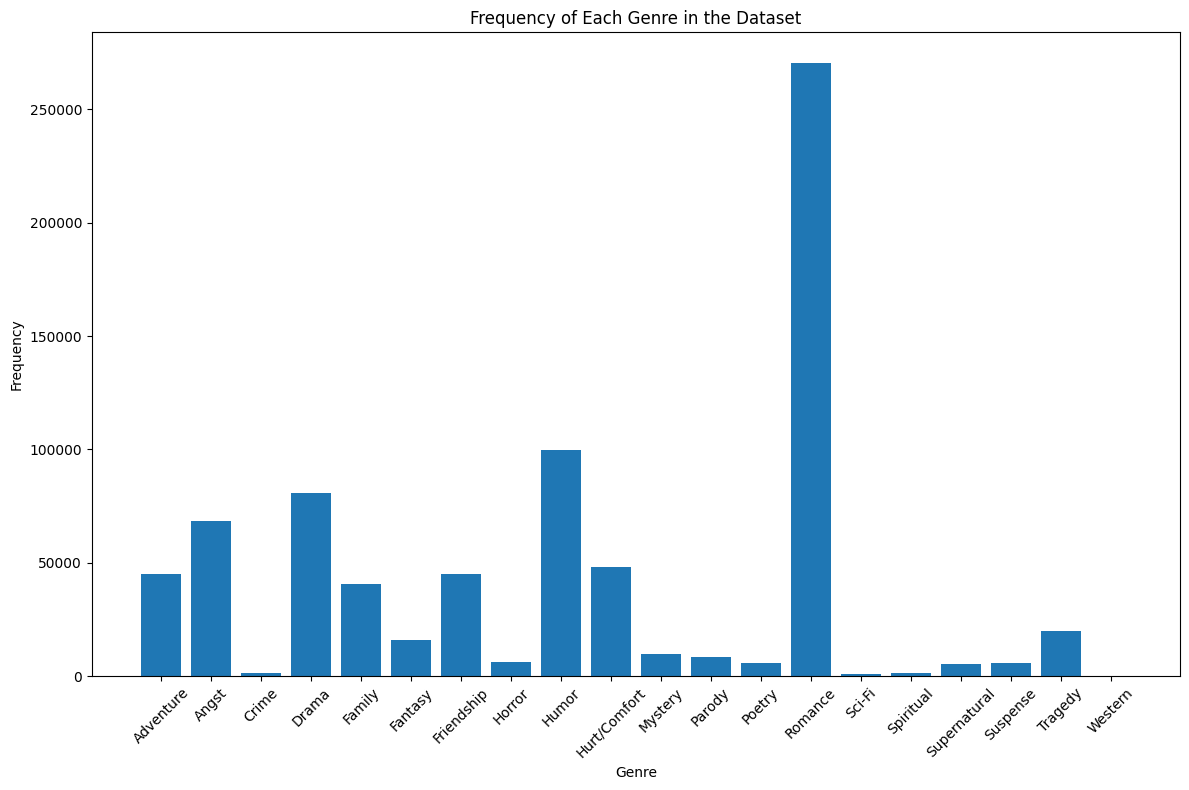

In [ ]:
genre_counts = y.sum(axis=0)

# 创建条形图
plt.figure(figsize=(12, 8))
plt.bar(mlb.classes_, genre_counts)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Each Genre in the Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
unique_genres = set()

# 遍历每行的 genre 列
for genre_list in df['genre']:
    # 将列表转换为元组，然后添加到集合中
    unique_genres.add(tuple(genre_list))  # 现在是添加元组到集合中

# 打印独特类别的数量
print(f"共有 {len(unique_genres)} 种独特的类别。")


共有 403 种独特的类别。


In [ ]:
# 打印出前几个类别查看是否正确
print(df['genre'].head(10))


0          [Angst, Hurt/Comfort]
1                 [Angst, Drama]
2                        [Angst]
3             [Romance, Fantasy]
5                       [Sci-Fi]
6                       [Sci-Fi]
7     [Hurt/Comfort, Friendship]
8         [Family, Hurt/Comfort]
9               [Angst, Romance]
10       [Romance, Supernatural]
Name: genre, dtype: object


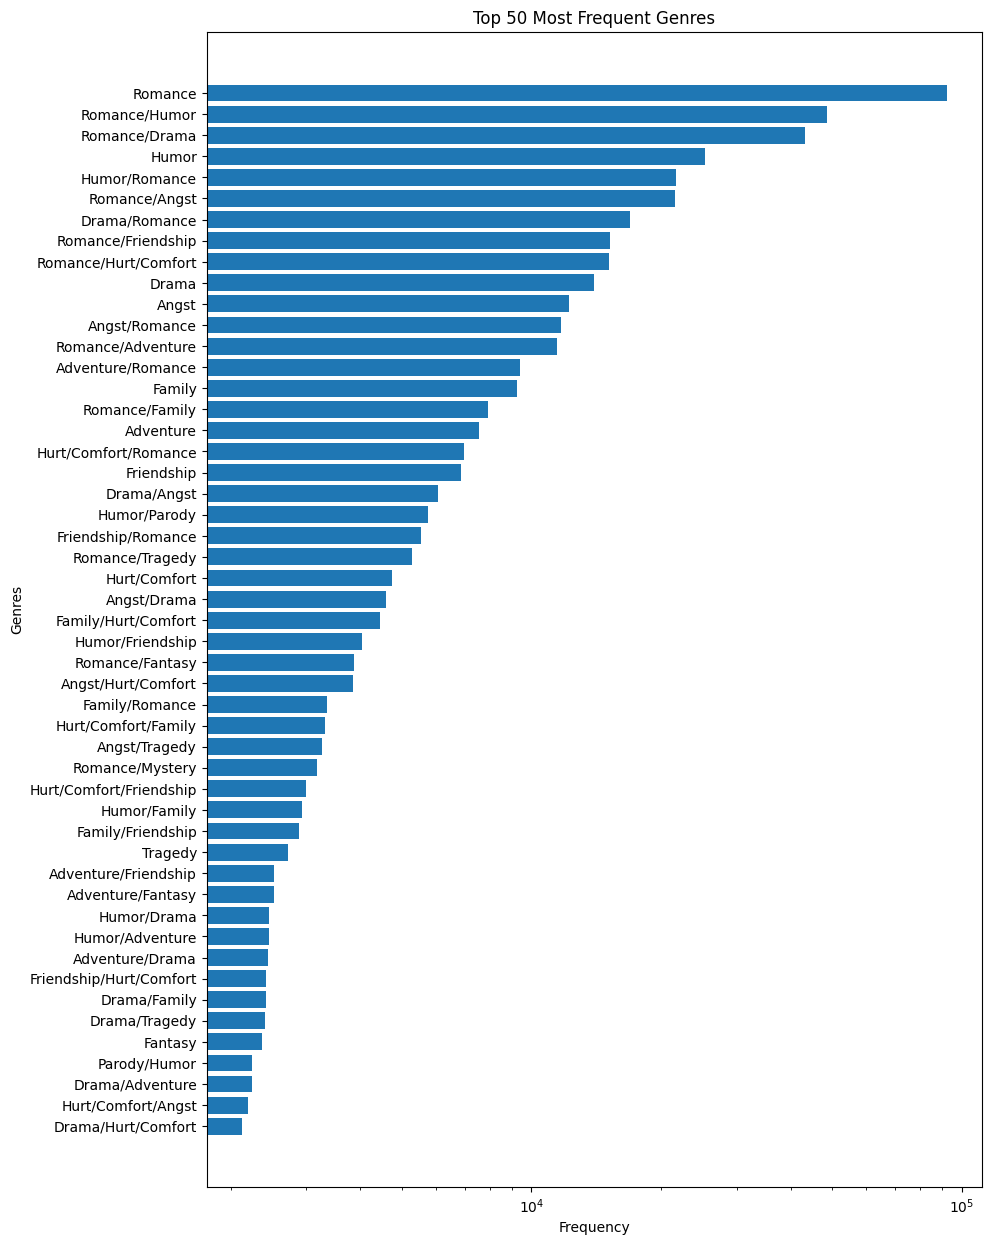

In [ ]:
# 将每个列表转换为由斜杠分隔的字符串
df['genre_string'] = df['genre'].apply(lambda x: '/'.join(x))

# 计算转换后的字符串的出现频率
genre_counts = df['genre_string'].value_counts().head(50)

# 绘制条形图
plt.figure(figsize=(10, 15))
plt.barh(genre_counts.index, genre_counts)
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Top 50 Most Frequent Genres')
plt.xscale("log")
plt.gca().invert_yaxis()
plt.show()
每一类数量（20类，不是400类）

# bag of words wrong codes

In [ ]:
pip install pandas scikit-learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
co = CountVectorizer(
    analyzer='word',
    ngram_range=(1,4),
    max_features=150000
)


In [ ]:
co.fit(synopsis)

CountVectorizer(max_features=150000, ngram_range=(1, 4))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(synopsis,y,random_state=1234)

In [ ]:
x_train[1]

"When a plot from the Founder's age is revealed, Bailey Ravenclaw reappears in the pureblooded political scene, throwing it into an uproar. When she is sorted into Slytherin, rather than her own house, questions begin to swirl. A voice in her head begins to try and turn her towards the Dark Lord's followers. Political Fiction with minor Dumbledore bashing. Generally following canon."

In [ ]:
x_train = co.transform(x_train)
x_test = co.transform(x_test)

In [ ]:
print("训练数据的特征数量: ", x_train.shape[1])
print("测试数据的特征数量: ", x_test.shape[1])

训练数据的特征数量:  150000
测试数据的特征数量:  150000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Initialize Logistic Regression
logreg = LogisticRegression(solver='liblinear')

# Create the MultiOutputClassifier model
multioutput_classifier = MultiOutputClassifier(logreg)

# Train the model
multioutput_classifier.fit(x_train, y_train)

# Predicting the test set results
Y_pred_multi = multioutput_classifier.predict(y_test)

ValueError: X has 20 features, but LogisticRegression is expecting 150000 features as input.

# bag of words

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming df['synopsis'] has been preprocessed to fill any NaNs or None types
synopsis = df[df['language'] == 'English']['synopsis']
y = mlb.fit_transform(df[df['language'] == 'English']['genre'])  # Assuming this line works without issues

# Split your data first
x_train_raw, x_test_raw, y_train, y_test = train_test_split(synopsis, y, test_size=0.25, random_state=1234)



In [ ]:
# Initialize your CountVectorizer
co = CountVectorizer(strip_accents = 'unicode', analyzer='word', ngram_range=(1,3), max_features=150000)

# Fit the vectorizer on the TRAINING data only
co.fit(x_train_raw)

# Transform both the training and test datasets
x_train_co = co.transform(x_train_raw)
x_test_co = co.transform(x_test_raw)

In [ ]:
co2 = CountVectorizer(strip_accents = 'unicode', analyzer='word', ngram_range=(1,3), max_features='None')
co2.fit(x_train_raw)
x_train_co2 = co2.transform(x_train_raw)
x_test_co2 = co2.transform(x_test_raw)

In [ ]:
tfid = TfidfVectorizer(strip_accents = 'unicode', analyzer='word', ngram_range=(1,3), max_features=None)
tfid.fit(x_train_raw)
x_train_tfid = tfid.transform(x_train_raw)
x_test_tfid = tfid.transform(x_test_raw)


In [ ]:
#这个
tfid2 = TfidfVectorizer(strip_accents = 'unicode', analyzer='word', lowercase=True, ngram_range=(1,3), max_features=10000)
tfid2.fit(x_train_raw)
x_train_tfid2 = tfid2.transform(x_train_raw)
x_test_tfid2 = tfid2.transform(x_test_raw)

# bow - logistic regression - Accuracy


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Train your MultiOutputClassifier with Logistic Regression
model = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
model.fit(x_train_tfid, y_train)  # Make sure x_train is correctly transformed

# Prediction
y_pred = model.predict(x_test_tfid)

In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of features expected by model:", x_train.shape[1])

Training data shape: (343481, 150000)
Test data shape: (114494, 150000)
Number of features expected by model: 150000


In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))

Accuracy: 0.16174646706377627
Hamming Loss: 0.07726125386483135
F1 Score: 0.4777776793857979


# bow - logistic regression - all


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
import numpy as np

In [ ]:
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度。如果预测的标签集合是真实标签集合的子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        # 将标签数组转换为集合
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        # 检查预测集合是否为真实集合的子集
        if pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples


# 训练模型
model = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
model.fit(x_train_tfid2, y_train)  # 确保x_train已正确转换

# 预测
y_pred_LR_bow = model.predict(x_test_tfid2)

In [ ]:
# 计算自定义的部分精度
partial_acc = partial_accuracy_score(y_test, y_pred_LR_bow)
partial_f1_score = partial_f1_score(y_test, y_pred_LR_bow)
partial_hamming_loss = partial_hamming_loss(y_test, y_pred_LR_bow)
print("Partial Accuracy Score:", partial_acc)
print("Partial F1 Score:", partial_f1_score)
print("Partial Hamming Loss:", partial_hamming_loss)

# 计算其他指标
print("Accuracy:", accuracy_score(y_test, y_pred_LR_bow))
hamm_loss_val = hamming_loss(y_test, y_pred_LR_bow)
f1_val = f1_score(y_test, y_pred_LR_bow, average='micro')
print("Hamming Loss:", hamm_loss_val)
print("F1 Score:", f1_val)

Partial Accuracy Score: 0.7786521564448792
Partial F1 Score: 0.809314607461252
Partial Hamming Loss: 0.02665598197285569
Accuracy: 0.1661309762957011
Hamming Loss: 0.06590301675196954
F1 Score: 0.4820674743453341


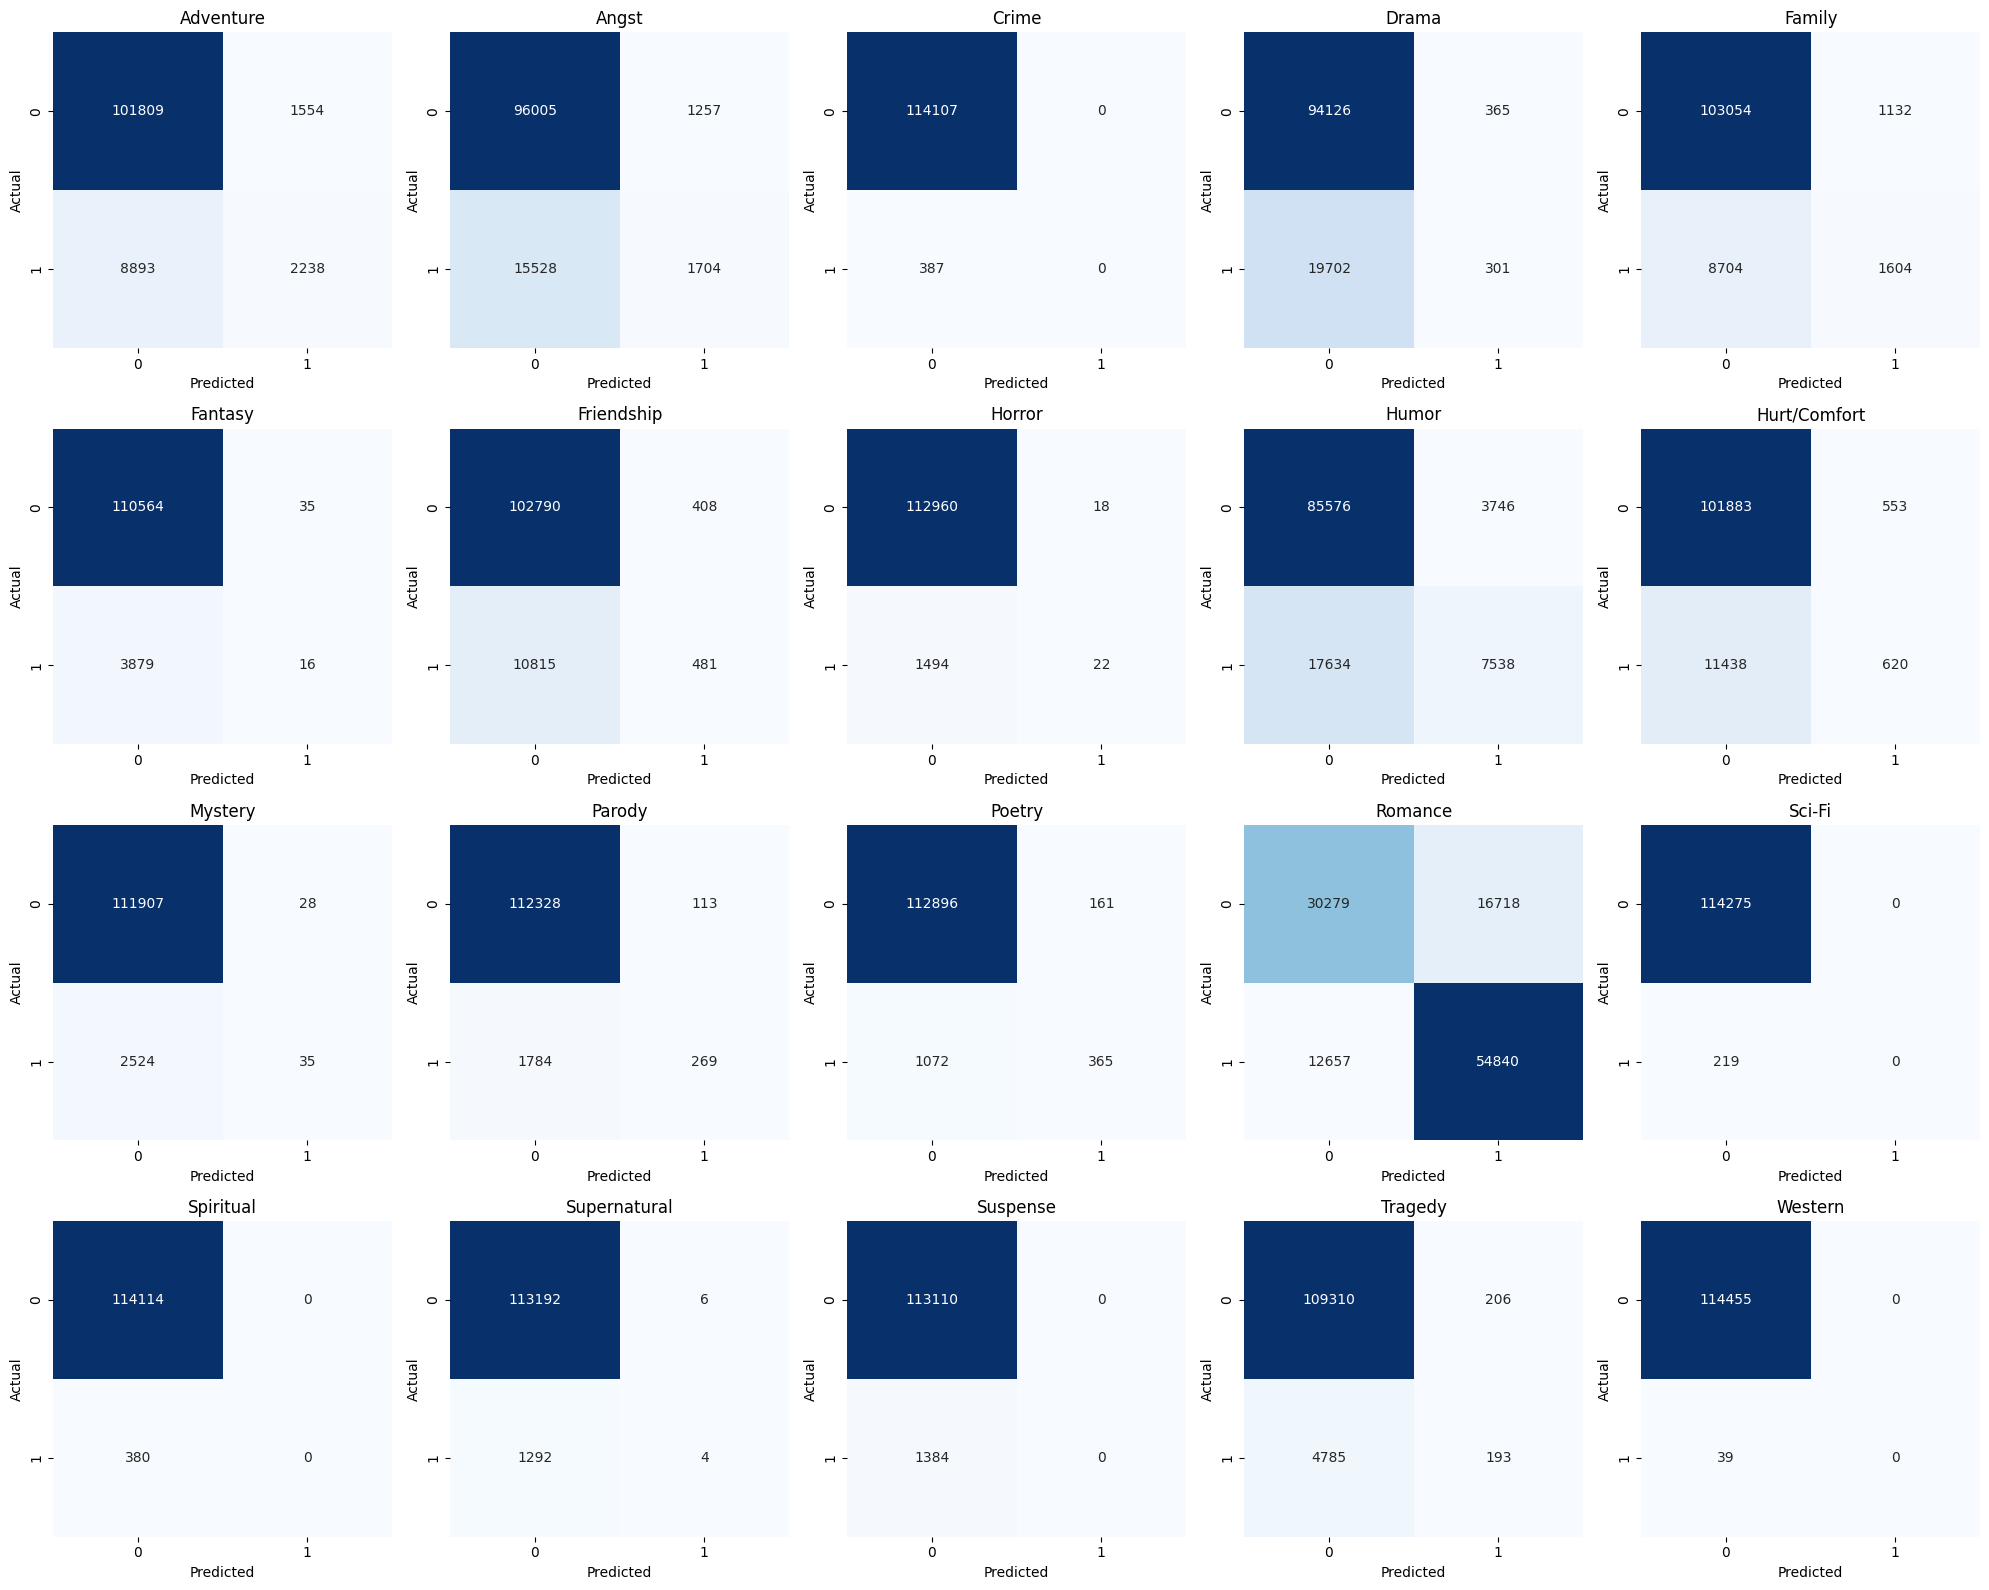

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 y_pred_LR_bow 是预测结果，y_test 是真实标签
# 如果 y_pred_LR_bow 不是二进制形式，取消下面两行的注释
# threshold = 0.5
# y_pred_LR_bow = (y_pred_LR_bow > threshold).astype(int)

# 计算多标签混淆矩阵
conf_matrix = multilabel_confusion_matrix(y_test, y_pred_LR_bow)

labels = mlb.classes_

# 获取标签的数量
num_labels = conf_matrix.shape[0]  # 标签的数量

# 设置matplotlib图形
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 调整为4x5网格

# 展平axes数组以便更容易索引
axes = axes.flatten()

# 循环遍历标签并绘制每个混淆矩阵
for i in range(num_labels):
    ax = axes[i]
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)  # 关闭颜色条以清晰显示
    ax.set_title(f'{labels[i]}')  # 使用mlb.classes_中的标签名称
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

# 隐藏任何未使用的子图
for i in range(num_labels, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度。如果预测的标签集合是真实标签集合的子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        # 将标签数组转换为集合
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        # 检查预测集合是否为真实集合的子集
        if pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

# 假设 y_train 和 y_test 已经定义并且是正确的多标签二进制格式

# 计算多数类
majority_class = (np.sum(y_train, axis=0) > (y_train.shape[0] / 2)).astype(int)

# 创建基线预测
y_pred_baseline1 = np.tile(majority_class, (y_test.shape[0], 1))

# 评估基线模型
f1_micro = f1_score(y_test, y_pred_baseline1, average='micro')
print("Micro-average F1 score: ", f1_micro)

# 计算精确度
accuracy = accuracy_score(y_test, y_pred_baseline1)
print("Accuracy: ", accuracy)

# 计算Hamming损失
hamming = hamming_loss(y_test, y_pred_baseline1)
print("Hamming Loss: ", hamming)

# 计算部分精确度
partial_acc = partial_accuracy_score(y_test, y_pred_baseline1)
print("Partial Accuracy Score:", partial_acc)

# 计算部分F1分数
partial_f1 = partial_f1_score(y_test, y_pred_baseline1)
print("Partial F1 Score:", partial_f1)

# 计算部分Hamming损失
partial_hamming = partial_hamming_loss(y_test, y_pred_baseline1)
print("Partial Hamming Loss:", partial_hamming)


Micro-average F1 score:  0.4364020767196622
Accuracy:  0.14001607071112895
Hamming Loss:  0.07613499397348332
Partial Accuracy Score: 0.589524341886911
Partial F1 Score: 0.589524341886911
Partial Hamming Loss: 0.053659580414687436


# bow - Random Forest - Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# 初始化随机森林分类器
# 注意：随机森林参数应根据您的具体需求进行调整
# n_estimators是森林中树的数量，max_depth是树的最大深度
rf_classifier = RandomForestClassifier(n_estimators=50,  min_samples_split=10,  # 增加样本的采样间隔
    min_samples_leaf=4,  # 增加叶子节点的最小样本数
    max_features='sqrt',  # 使用部分特征
    bootstrap=True,  # 使用引导样本
    n_jobs=-1,  # 并行计算
    random_state=1234)

# 由于您正在进行多标签分类，您需要使用MultiOutputClassifier来包装您的随机森林
multioutput_rf_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# 训练随机森林
# 这可能需要一些时间，具体取决于数据量和计算资源
multioutput_rf_classifier.fit(x_train, y_train)

# 进行预测
y_pred = multioutput_rf_classifier.predict(x_test)




In [ ]:
# 评估模型性能
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

# 计算准确率，F1分数和汉明损失
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro') # 对于多标签数据，'micro'平均可能更为合适
hamming = hamming_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

# bow - Random Forest - all

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, hamming_loss
import numpy as np

In [ ]:
# 定义部分准确率计算函数
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度，如果预测的标签集合是真实标签集合的非空子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        if pred_set and pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,  # 并行计算
    random_state=1234
)

# 使用MultiOutputClassifier包装随机森林
multioutput_rf_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# 训练模型
multioutput_rf_classifier.fit(x_train_tfid2, y_train)

# 进行预测
y_pred_RF_bow = multioutput_rf_classifier.predict(x_test_tfid2)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_RF_bow)
print(f'Accuracy: {accuracy}')
# 计算自定义的部分准确率
partial_acc = partial_accuracy_score(y_test, y_pred_RF_bow)
partial_f1_score = partial_f1_score(y_test, y_pred_RF_bow)
partial_hamming_loss = partial_hamming_loss(y_test, y_pred_RF_bow)
print("Partial Accuracy Score:", partial_acc)
print("Partial F1 Score:", partial_f1_score)
print("Partial Hamming Loss:", partial_hamming_loss)

# 计算F1分数和汉明损失
f1 = f1_score(y_test, y_pred_RF_bow, average='micro')
hamming = hamming_loss(y_test, y_pred_RF_bow)

print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

Accuracy: 0.1354743480007686
Partial Accuracy Score: 0.5082100372071899
Partial F1 Score: 0.8185803040625179
Partial Hamming Loss: 0.024063269690990128
F1 Score: 0.43653788516190073
Hamming Loss: 0.06814287211556938


# bow - CNN - all


In [ ]:
!pip install scikeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def data_generator(x, y, batch_size, is_train=True):
    size = x.shape[0]
    indices = np.arange(size)
    if is_train:
        np.random.shuffle(indices)
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray() if hasattr(x, 'toarray') else x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            if not is_train:
                x_batch = x[i:].toarray() if hasattr(x, 'toarray') else x[i:]
                y_batch = y[i:]
                yield x_batch, y_batch
                break
            i = 0
            np.random.shuffle(indices)

inputs = Input(shape=(x_train_tfid2.shape[1],))
x = Dense(128, activation='relu')(inputs)  # 减少单元数
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 模型训练
train_gen = data_generator(x_train_tfid2, y_train, batch_size=16)
model.fit(train_gen, steps_per_epoch=int(np.ceil(x_train_tfid2.shape[0] / 16)), epochs=5, verbose=1)


Epoch 1/5
21468/21468 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.2163 - loss: 0.2010
Epoch 2/5
21468/21468 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.2643 - loss: 0.1779
Epoch 3/5
21468/21468 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.2692 - loss: 0.1741
Epoch 4/5
21468/21468 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.2737 - loss: 0.1714
Epoch 5/5
21468/21468 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.2772 - loss: 0.1695


In [ ]:
# 修改模型评估部分
test_gen = data_generator(x_test_tfid2, y_test, batch_size=16, is_train=False)
preds = model.predict(test_gen, steps=int(np.ceil(x_test_tfid2.shape[0] / 16)))

# 确保y_pred_binary和y_test长度相同
if preds.shape[0] != y_test.shape[0]:
    preds = preds[:y_test.shape[0]]
y_pred_binary1 = (preds > 0.5).astype(int)

# 定义包含匹配的准确率计算函数
def partial_accuracy_score(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        if pred_set.issubset(true_set):
            correct += 1
    return correct / len(y_true)

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples


# 重新计算评估指标
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

partial_acc = partial_accuracy_score(y_test, y_pred_binary1)
partial_f1_score = partial_f1_score(y_test, y_pred_binary1)
partial_hamming_loss = partial_hamming_loss(y_test, y_pred_binary1)
hamm_loss = hamming_loss(y_test, y_pred_binary1)
f1 = f1_score(y_test, y_pred_binary1, average='micro')

print("Partial Accuracy Score:", partial_acc)
print("Partial F1 Score:", partial_f1_score)
print("Partial Hamming Loss:", partial_hamming_loss)
print("Hamming Loss:", hamm_loss)
print("F1 Score:", f1)


7156/7156 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
Partial Accuracy Score: 0.7811937743462539
Partial F1 Score: 0.8114532930401163
Partial Hamming Loss: 0.02629919471762828
Hamming Loss: 0.06579253061295788
F1 Score: 0.4821235214651804


# bow - CNN - Partial Accuracy


In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# 定义包含匹配的准确率计算函数
def partial_accuracy_score(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        if pred_set.issubset(true_set):
            correct += 1
    return correct / len(y_true)

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples

# 定义生成器
def data_generator(x, y, batch_size):
    size = x.shape[0]
    indices = np.arange(size)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray()
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            i = 0
            np.random.shuffle(indices)
            continue

# 模型定义使用Functional API
inputs = Input(shape=(x_train_tfid2.shape[1],))
x = Embedding(input_dim=50000, output_dim=50)(inputs)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
train_gen = data_generator(x_train_tfid2, y_train, batch_size=32)
model.fit(train_gen, steps_per_epoch=int(np.ceil(x_train_tfid2.shape[0] / 32)), epochs=5, verbose=1)

Epoch 1/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1898s 173ms/step - accuracy: 0.1585 - loss: 0.2212
Epoch 2/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1861s 173ms/step - accuracy: 0.1601 - loss: 0.2112
Epoch 3/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1861s 173ms/step - accuracy: 0.1600 - loss: 0.2105
Epoch 4/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1860s 173ms/step - accuracy: 0.1601 - loss: 0.2101
Epoch 5/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1859s 173ms/step - accuracy: 0.1600 - loss: 0.2099


In [ ]:
# 执行预测
test_gen = data_generator(x_test, y_test, batch_size=32)
preds = model.predict(test_gen, steps=int(np.ceil(x_test.shape[0] / 32)))
y_pred_binary = (preds > 0.5).astype(int)

# 确保预测结果和真实标签长度一致
y_pred_binary = y_pred_binary[:y_test.shape[0]]

# 现在使用评估函数
partial_acc = partial_accuracy_score(y_test, y_pred_binary)
partial_f1_score = partial_f1_score(y_test, y_pred_binary)
partial_hamming_loss = partial_hamming_loss(y_test, y_pred_binary)
hamm_loss = hamming_loss(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary, average='micro')

print("Partial Accuracy Score:", partial_acc)
print("Partial F1 Score:", partial_f1_score)
print("Partial Hamming Loss:", partial_hamming_loss)
print("Hamming Loss:", hamm_loss)
print("F1 Score:", f1)


3578/3578 ━━━━━━━━━━━━━━━━━━━━ 71s 20ms/step
Partial Accuracy Score: 0.589524341886911
Hamming Loss: 0.07613499397348332
F1 Score: 0.2569631836085356


# Word2Vec

In [ ]:
import nltk
import sklearn
print("NLTK version:", nltk.__version__)
print("Scikit-learn version:", sklearn.__version__)

NLTK version: 3.8.1
Scikit-learn version: 1.2.2


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 分词处理
tokenized_texts = [word_tokenize(text.lower()) for text in synopsis]

# 训练Word2Vec模型
model = Word2Vec(sentences=tokenized_texts, vector_size=200, window=10, min_count=5, workers=4, sg=1)

# 使用模型
word_vectors = model.wv

In [ ]:
def document_vector(word_vec_model, doc):
    # 删除文档中不在词汇表中的词
    doc = [word for word in doc if word in word_vec_model.key_to_index]
    if len(doc) == 0:
        return np.zeros(word_vec_model.vector_size)
    else:
        return np.mean(word_vec_model[doc], axis=0)

# 应用上面的函数到每个文档
x = np.array([document_vector(word_vectors, text) for text in tokenized_texts])

In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss, f1_score

def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度。如果预测的标签集合是真实标签集合的子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        # 将标签数组转换为集合
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        # 检查预测集合是否为真实集合的子集
        if pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples

# 计算多数类
majority_class = (np.sum(y_train2, axis=0) > (y_train2.shape[0] / 2)).astype(int)

# 创建基线预测
y_pred_baseline2 = np.tile(majority_class, (y_test2.shape[0], 1))


# 计算精确度
accuracy = accuracy_score(y_test2, y_pred_baseline2)
partial_acc = partial_accuracy_score(y_test2, y_pred_baseline2)
partial_f1_score = partial_f1_score(y_test2, y_pred_baseline2)
partial_hamming_loss = partial_hamming_loss(y_test2, y_pred_baseline2)


# 计算Hamming损失
hamming = hamming_loss(y_test2, y_pred_baseline2)

f1_micro = f1_score(y_test2, y_pred_baseline2, average='micro')

print("Micro-average F1 score: ", f1_micro)

print("Accuracy: ", accuracy)
print("Hamming Loss: ", hamming)
print("Partial Accuracy Score:", partial_acc)
print("Partial F1 Score:", partial_f1_score)
print("Partial Hamming Loss:", partial_hamming_loss)

Micro-average F1 score:  0.4363835099020787
Accuracy:  0.14007720928607612
Hamming Loss:  0.076111411951718
Partial Accuracy Score: 0.5892972557513931
Partial F1 Score: 0.5892972557513931
Partial Hamming Loss: 0.05365040962844441


# w2v - logistic regression - Accuracy

In [ ]:
# 初始化并训练多输出分类器
model = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=LogisticRegression(solver='liblinear'))

In [ ]:
Y_pred = model.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average='micro')  # 使用micro平均
hamming = hamming_loss(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

Accuracy: 0.15225251978269605
F1 Score: 0.4605748890455846
Hamming Loss: 0.06815204290181145


# w2v - logistic regression - all

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, f1_score
import numpy as np


In [ ]:
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度。如果预测的标签集合是真实标签集合的子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        # 将标签数组转换为集合
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        # 检查预测集合是否为真实集合的子集
        if pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples

# 训练模型
model = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
model.fit(x_train2, y_train2)  # 确保x_train已正确转换

# 预测
y_pred_LR_w2v = model.predict(x_test2)

In [ ]:
# 计算自定义的部分精度
partial_acc = partial_accuracy_score(y_test2, y_pred_LR_w2v)
partial_f1_score = partial_f1_score(y_test2, y_pred_LR_w2v)
partial_hamming_loss = partial_hamming_loss(y_test2, y_pred_LR_w2v)
print("Partial F1 Score:", partial_f1_score)
print("Partial Hamming Loss:", partial_hamming_loss)
print("Partial Accuracy Score:", partial_acc)

# 计算其他指标
hamm_loss_val = hamming_loss(y_test2, y_pred_LR_w2v)
f1_val = f1_score(y_test2, y_pred_LR_w2v, average='micro')
accuracy = accuracy_score(y_test2, y_pred_LR_w2v)
print("Hamming Loss:", hamm_loss_val)
print("F1 Score:", f1_val)
print("Accuracy: ", accuracy)

Partial F1 Score: 0.7950427845252199
Partial Hamming Loss: 0.028319387915526063
Partial Accuracy Score: 0.7668262092336716
Hamming Loss: 0.06817955526053766
F1 Score: 0.46044105296990184
Accuracy:  0.15199049731863679


# w2v - Random Forest- Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# 初始化随机森林分类器
# 注意：随机森林参数应根据您的具体需求进行调整
# n_estimators是森林中树的数量，max_depth是树的最大深度
rf_classifier = RandomForestClassifier(n_estimators=50,  min_samples_split=10,  # 增加样本的采样间隔
    min_samples_leaf=4,  # 增加叶子节点的最小样本数
    max_features='sqrt',  # 使用部分特征
    bootstrap=True,  # 使用引导样本
    n_jobs=-1,  # 并行计算
    random_state=1234)

# 由于您正在进行多标签分类，您需要使用MultiOutputClassifier来包装您的随机森林
multioutput_rf_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# 训练随机森林
# 这可能需要一些时间，具体取决于数据量和计算资源
multioutput_rf_classifier.fit(x_train, y_train)

# 进行预测
y_pred = multioutput_rf_classifier.predict(x_test)




/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
# 评估模型性能
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

# 计算准确率，F1分数和汉明损失
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro') # 对于多标签数据，'micro'平均可能更为合适
hamming = hamming_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

Accuracy: 0.13294146418152916
F1 Score: 0.43546030199707747
Hamming Loss: 0.06883504812479256


# w2v - Random Forest- all


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
import numpy as np

In [ ]:
# 定义部分准确率计算函数
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度，如果预测的标签集合是真实标签集合的非空子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        if pred_set and pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,  # 并行计算
    random_state=1234
)

# 使用MultiOutputClassifier包装随机森林
multioutput_rf_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# 训练模型
multioutput_rf_classifier.fit(x_train2, y_train2)

# 进行预测
y_pred_RF_w2v = multioutput_rf_classifier.predict(x_test2)

In [ ]:
# 计算自定义的部分精度
partial_acc = partial_accuracy_score(y_test2, y_pred_RF_w2v)
partial_f1_score = partial_f1_score(y_test2, y_pred_RF_w2v)
partial_hamming_loss = partial_hamming_loss(y_test2, y_pred_RF_w2v)
print("Partial F1 Score:", partial_f1_score)
print("Partial Hamming Loss:", partial_hamming_loss)
print("Partial Accuracy Score:", partial_acc)

# 计算其他指标
hamm_loss_val = hamming_loss(y_test2, y_pred_RF_w2v)
f1_val = f1_score(y_test2, y_pred_RF_w2v, average='micro')
accuracy = accuracy_score(y_test2, y_pred_RF_w2v)
print("Hamming Loss:", hamm_loss_val)
print("F1 Score:", f1_val)
print("Accuracy: ", accuracy)

Partial F1 Score: 0.7844224733756101
Partial Hamming Loss: 0.028492759445912442
Partial Accuracy Score: 0.5032578126364701
Hamming Loss: 0.06995082711757822
F1 Score: 0.4299294258330635
Accuracy:  0.13481929184062047


# w2v - CNN- Accuracy



In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# 定义生成器
def data_generator(x, y, batch_size):
    size = x.shape[0]
    indices = np.arange(size)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray()
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            i = 0
            np.random.shuffle(indices)
            continue

# 模型定义使用Functional API
inputs = Input(shape=(x_train.shape[1],))
x = Embedding(input_dim=50000, output_dim=50)(inputs)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
train_gen = data_generator(x_train, y_train, batch_size=32)
model.fit(train_gen, steps_per_epoch=int(np.ceil(x_train.shape[0] / 32)), epochs=5, verbose=1)

Epoch 1/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1871s 174ms/step - accuracy: 0.1573 - loss: 0.2221
Epoch 2/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1868s 174ms/step - accuracy: 0.1589 - loss: 0.2116
Epoch 3/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1868s 174ms/step - accuracy: 0.1589 - loss: 0.2110
Epoch 4/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1869s 174ms/step - accuracy: 0.1590 - loss: 0.2106
Epoch 5/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1870s 174ms/step - accuracy: 0.1589 - loss: 0.2103


In [ ]:
# 定义生成器
def data_generator(x, y, batch_size, is_train=True):
    size = x.shape[0]
    indices = np.arange(size)
    if is_train:
        np.random.shuffle(indices)  # 只在训练时打乱顺序
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray()
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            if not is_train:
                # 在测试时处理最后一个批次，确保输出样本数正确
                x_batch = x[i:].toarray()
                y_batch = y[i:]
                yield x_batch, y_batch
                break  # 确保最后一个批次后停止迭代
            i = 0
            np.random.shuffle(indices)

# 修改模型评估部分
test_gen = data_generator(x_test, y_test, batch_size=32, is_train=False)
preds = model.predict(test_gen, steps=int(np.ceil(x_test.shape[0] / 32)))
y_pred_binary = (preds > 0.5).astype(int)

# 确保y_pred_binary和y_test长度相同
if y_pred_binary.shape[0] != y_test.shape[0]:
    y_pred_binary = y_pred_binary[:y_test.shape[0]]

# 重新计算评估指标
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

acc = accuracy_score(y_test, y_pred_binary)
hamm_loss = hamming_loss(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Accuracy Score:", acc)
print("Hamming Loss:", hamm_loss)
print("F1 Score:", f1)


3578/3578 ━━━━━━━━━━━━━━━━━━━━ 72s 20ms/step
Accuracy Score: 0.14000733662899367
Hamming Loss: 0.07613499397348332
F1 Score: 0.25696220047744306


# w2v - CNN- all


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 44.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def data_generator(x, y, batch_size):
    size = x.shape[0]
    indices = np.arange(size)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            if hasattr(x[i:i+batch_size], 'toarray'):  # 检查对象是否有 .toarray() 方法
                x_batch = x[i:i+batch_size].toarray()  # 对于稀疏矩阵，转换为密集数组
            else:
                x_batch = x[i:i+batch_size]  # 对于非稀疏矩阵，直接使用
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            i = 0
            np.random.shuffle(indices)


# 模型定义使用Functional API
inputs = Input(shape=(x_train2.shape[1],))
x = Embedding(input_dim=50000, output_dim=50)(inputs)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train2.shape[1], activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
train_gen = data_generator(x_train2, y_train2, batch_size=32)
model.fit(train_gen, steps_per_epoch=int(np.ceil(x_train2.shape[0] / 32)), epochs=5, verbose=1)

Epoch 1/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.1595 - loss: 0.2215
Epoch 2/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.1602 - loss: 0.2123
Epoch 3/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.1602 - loss: 0.2116
Epoch 4/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.1601 - loss: 0.2114
Epoch 5/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.1600 - loss: 0.2112


In [ ]:
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度，如果预测的标签集合是真实标签集合的非空子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        if pred_set and pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

def partial_f1_score(y_true, y_pred):
    """计算部分F1分数，考虑预测标签集是真实标签集的子集的情况。"""
    n_samples = y_true.shape[0]
    total_f1_score = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        if pred_set.issubset(true_set):
            total_f1_score += 1
        else:
            intersection = len(true_set.intersection(pred_set))
            union = len(true_set.union(pred_set))
            if union == 0:
                f1_score = 1.0  # Both sets are empty
            else:
                f1_score = 2 * intersection / (len(true_set) + len(pred_set))
            total_f1_score += f1_score

    return total_f1_score / n_samples

def partial_hamming_loss(y_true, y_pred):
    """计算包含匹配的Hamming损失。"""
    n_samples = y_true.shape[0]
    total_loss = 0

    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])

        # 如果预测集合是真实集合的子集，则没有损失
        if pred_set.issubset(true_set):
            continue
        else:
            # 计算标准Hamming损失
            loss = np.sum(np.not_equal(true, pred).astype(int)) / len(true)
            total_loss += loss

    return total_loss / n_samples

In [ ]:
# 执行预测
test_gen = data_generator(x_test2, y_test2, batch_size=32)
preds = model.predict(test_gen, steps=int(np.ceil(x_test2.shape[0] / 32)))
y_pred_binary2 = (preds > 0.5).astype(int)

# 确保预测结果和真实标签长度一致
y_pred_binary2 = y_pred_binary2[:y_test2.shape[0]]

# 计算自定义的部分精度
partial_acc = partial_accuracy_score(y_test2, y_pred_binary2)
partial_f1_score = partial_f1_score(y_test2, y_pred_binary2)
partial_hamming_loss = partial_hamming_loss(y_test2, y_pred_binary2)
print("Partial F1 Score:", partial_f1_score)
print("Partial Hamming Loss:", partial_hamming_loss)
print("Partial Accuracy Score:", partial_acc)

# 计算其他指标
hamm_loss_val = hamming_loss(y_test2, y_pred_binary2)
f1_val = f1_score(y_test2, y_pred_binary2, average='micro')
print("Hamming Loss:", hamm_loss_val)
print("F1 Score:", f1_val)
accuracy = accuracy_score(y_test2, y_pred_binary2)
print("Accuracy: ", accuracy)


3578/3578 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Partial F1 Score: 0.5892972557513931
Partial Hamming Loss: 0.05365040962844441
Partial Accuracy Score: 0.5892972557513931
Hamming Loss: 0.076111411951718
F1 Score: 0.4363835099020787
Accuracy:  0.14007720928607612


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
# Generate predictions
y_pred2 = model.predict(x_train2, verbose=1)
y_pred_binarized2 = (y_pred2 > 0.5).astype(int)

# Compute multilabel confusion matrix
conf_matrix = multilabel_confusion_matrix(y_train2, y_pred_binarized2)

print(conf_matrix)

10734/10734 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
[[[309732      0]
  [ 33749      0]]

 [[291956      0]
  [ 51525      0]]

 [[342409      0]
  [  1072      0]]

 [[283056      0]
  [ 60425      0]]

 [[312896      0]
  [ 30585      0]]

 [[331685      0]
  [ 11796      0]]

 [[309776      0]
  [ 33705      0]]

 [[338840      0]
  [  4641      0]]

 [[268488      0]
  [ 74993      0]]

 [[307444      0]
  [ 36037      0]]

 [[336116      0]
  [  7365      0]]

 [[337091      0]
  [  6390      0]]

 [[339147      0]
  [  4334      0]]

 [[     0 140491]
  [     0 202990]]

 [[342801      0]
  [   680      0]]

 [[342373      0]
  [  1108      0]]

 [[339522      0]
  [  3959      0]]

 [[339242      0]
  [  4239      0]]

 [[328709      0]
  [ 14772      0]]

 [[343389      0]
  [    92      0]]]


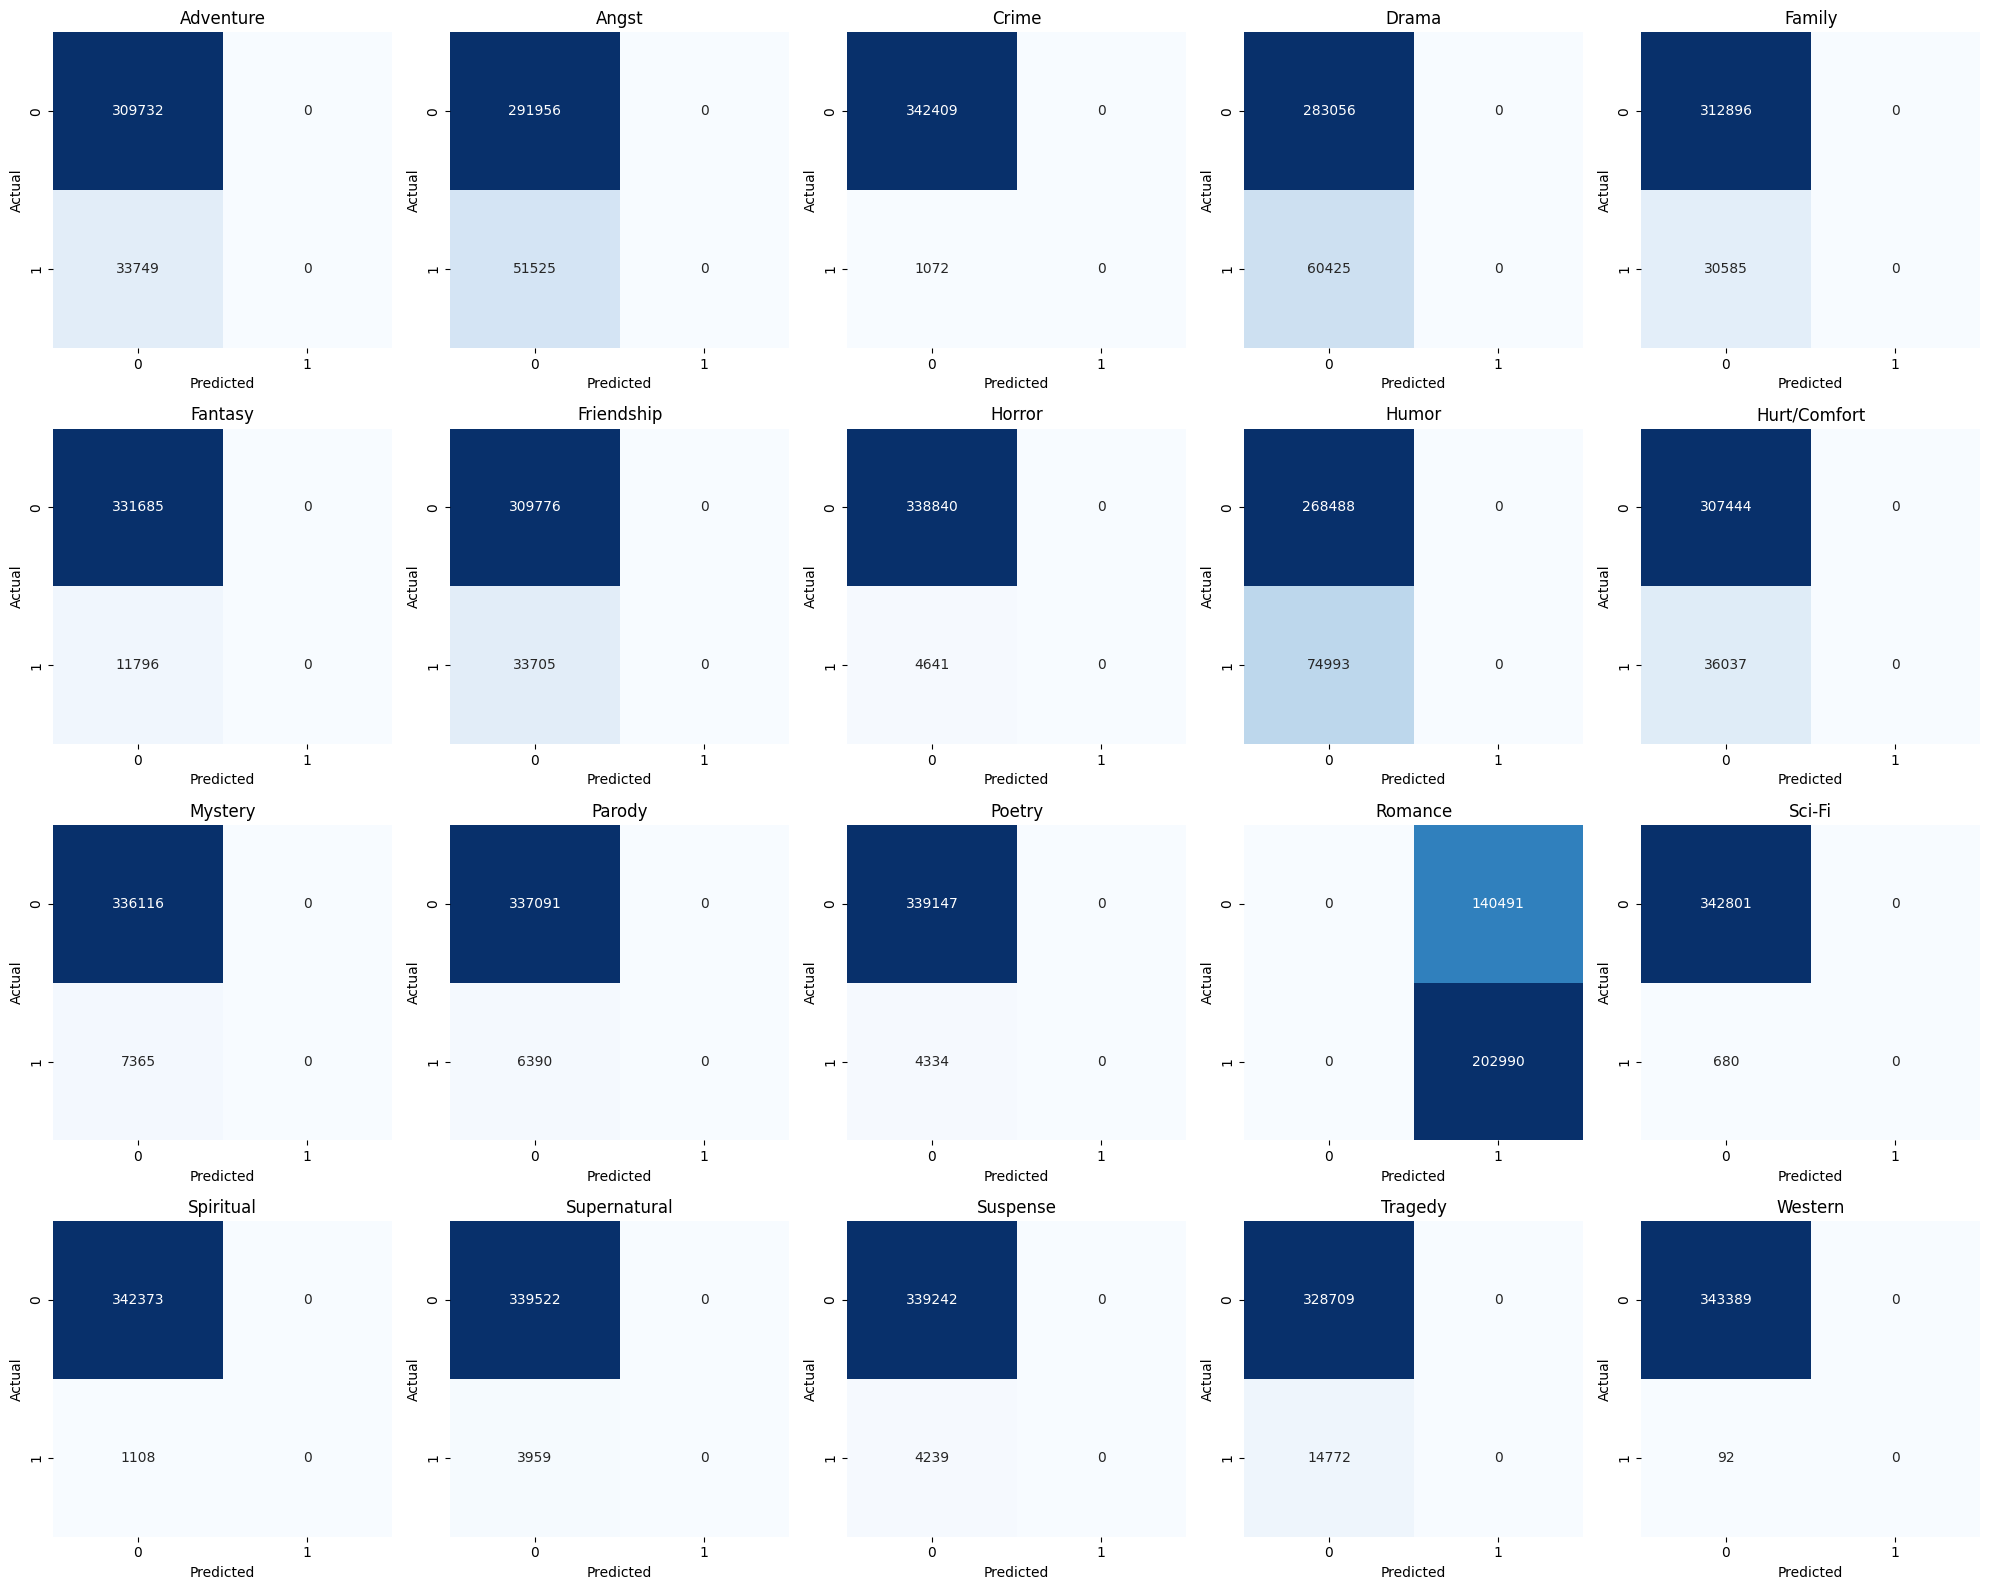

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already computed `conf_matrix` and you have the array `labels` from `mlb.classes_`
num_labels = conf_matrix.shape[0]  # Number of labels

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # Adjust for a 4x5 grid

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the labels and plot each confusion matrix
for i in range(num_labels):
    ax = axes[i]
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)  # Turn off color bar for clarity
    ax.set_title(f'{labels[i]}')  # Use label names from mlb.classes_
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

# Hide any unused subplots
for i in range(num_labels, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


# BERT (tried but failed)

In [ ]:
def custom_genre_split(genre_string):
    # 检查输入是否为字符串
    if isinstance(genre_string, str):
        # 如果是字符串，执行替换操作
        genre_string = genre_string.replace('Hurt/Comfort', 'Hurt-Comfort')
        genres = genre_string.split('/')
        genres = [genre.replace('Hurt-Comfort', 'Hurt/Comfort') for genre in genres]
    else:
        # 如果输入不是字符串，直接返回原始列表
        genres = genre_string

    return genres


In [ ]:
df['genre'] = df['genre'].apply(custom_genre_split)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'genre' lists into a binary matrix
y = mlb.fit_transform(df[df['language'] == 'English']['genre'])

# Output the class labels to verify
print("Labels:", mlb.classes_)

Labels: ['Adventure' 'Angst' 'Crime' 'Drama' 'Family' 'Fantasy' 'Friendship'
 'Horror' 'Humor' 'Hurt/Comfort' 'Mystery' 'Parody' 'Poetry' 'Romance'
 'Sci-Fi' 'Spiritual' 'Supernatural' 'Suspense' 'Tragedy' 'Western']


In [ ]:
import subprocess

# 卸载transformers包
subprocess.run(['pip', 'uninstall', 'transformers', '-y'], check=True)

# 清除pip缓存
subprocess.run(['pip', 'cache', 'purge'], check=True)

subprocess.run(["pip", "install", "transformers"], check=True)

CompletedProcess(args=['pip', 'install', 'transformers'], returncode=0)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# 假设df['genre']已经被正确处理成列表格式
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre'])

# 检查每个类别的样本数量
class_counts = y.sum(axis=0)
single_member_classes = [mlb.classes_[i] for i, count in enumerate(class_counts) if count < 2]

# 如果存在单一成员类别，删除这些类别
if single_member_classes:
    # 找到要保留的类别索引
    keep_idxs = [i for i, count in enumerate(class_counts) if count >= 2]
    # 更新类别和目标变量y
    mlb.classes_ = mlb.classes_[keep_idxs]
    y = y[:, keep_idxs]

print("更新后的类别:", mlb.classes_)


更新后的类别: ['Adventure' 'Angst' 'Crime' 'Drama' 'Family' 'Fantasy' 'Friendship'
 'Horror' 'Humor' 'Hurt/Comfort' 'Mystery' 'Parody' 'Poetry' 'Romance'
 'Sci-Fi' 'Spiritual' 'Supernatural' 'Suspense' 'Tragedy' 'Western']


In [ ]:
# 初始化MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# 确保df['genre']和df['synopsis']已经定义

# 应用自定义的流派分割函数
df['genre'] = df['genre'].apply(custom_genre_split)

# 过滤出英语条目
df_english = df[df['language'] == 'English']

# 对'genre'列表进行拟合和转换成二进制矩阵
y = mlb.fit_transform(df_english['genre'])

# 获取英语条目的'synopsis'
synopsis = df_english['synopsis']

# 检查形状是否匹配
print(synopsis.shape)  # 应该与y的第一维匹配
print(y.shape)

# 如果形状匹配，可以继续分割数据集
if synopsis.shape[0] == y.shape[0]:
  X_train, X_sample, y_train, y_sample = train_test_split(synopsis, y, test_size=0.1, random_state=42)
else:
    raise ValueError("The number of samples in 'synopsis' and 'y' must be the same")


(457975,)
(457975, 20)


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# 加载预训练的DistilBERT模型和分词器
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 将数据转化为列表格式，如果X_sample不是列表则需要这样做
X_sample = X_sample.tolist()

# 对抽取的文本进行分词处理
inputs = tokenizer(X_sample, padding=True, truncation=True, return_tensors="pt", max_length=512)

# 获取分词后的输入数据
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# 使用DistilBERT模型获取文本嵌入
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)

# 获取每个文本的DistilBERT嵌入表示
embeddings = outputs.last_hidden_state.mean(dim=1)  # 使用平均池化来代表整个句子的嵌入


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# 初始化Logistic Regression和MultiOutputClassifier
logreg = LogisticRegression(solver='liblinear')
multioutput_clf = MultiOutputClassifier(estimator=logreg)

# 训练模型
multioutput_clf.fit(X_train, Y_train)

In [ ]:
Y_pred = multioutput_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(Y_test, Y_pred)
# 计算F1分数
f1 = f1_score(Y_test, Y_pred, average='micro')  # micro方式计算所有标签的总体F1分数
# 计算汉明损失
hamming = hamming_loss(Y_test, Y_pred)

# 打印评估结果
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')